In [12]:
import pandas as pd
import os
import seaborn as sns

 1.Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов   (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем).
 
 2.Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
 
 3.Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
 
 4.Визуализируйте продажи по дням.
 
 5.Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [13]:
data = os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-skurlatova-33/shared/homeworks/python_ds_miniprojects/4/data')

In [14]:
path_2='/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-skurlatova-33/shared/homeworks/python_ds_miniprojects/4/data'

In [15]:
df=pd.DataFrame()
true_df=pd.DataFrame()
nada=pd.DataFrame()
for i in range(len(data)):
    year_folder=path_2+'/'+ data[i]
    date_list=year_folder.split('/')[-1]
    year_list=os.listdir(year_folder)
    for j in range(len(year_list)):
        name_folder=year_folder+'/'+year_list[j]
        name_list=os.listdir(name_folder)
        names_list=name_folder.split('/')[-1]
        for k in range(len(name_list)):
            file=name_folder+'/'+name_list[k]
            df=pd.read_csv(file)
            df['date']=date_list
            df['name']=names_list
            true_df=pd.concat([true_df,df])  

In [16]:
true_df

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
0,0,18,4,2020-12-07,Petr_Fedorov
1,1,94,4,2020-12-07,Petr_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [17]:
true_df.dtypes

Unnamed: 0     int64
product_id     int64
quantity       int64
date          object
name          object
dtype: object

In [18]:
true_df.quantity.sum()

480

In [19]:
true_df.groupby('name',as_index=False).agg({'quantity':'sum'}).sort_values('quantity')

,name,quantity
20,Vasiliy_Petrov,7
2,Alexey_Petrov,7
15,Rostislav_Ivanov,9
8,Kirill_Petrov,9
12,Petr_Petrov,14
...,...,...
16,Rostislav_Petrov,28
10,Petr_Fedorov,34
6,Anton_Smirnov,45
3,Alexey_Smirnov,52


In [20]:
x=true_df.groupby('product_id',as_index=False).agg({'quantity':'sum'})

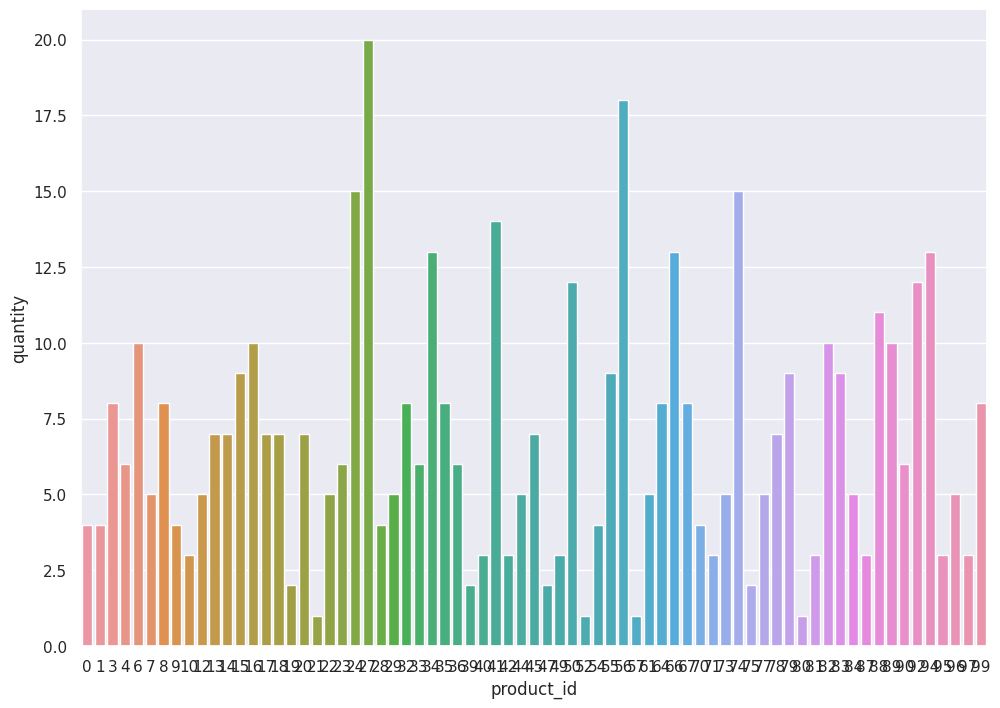

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='product_id', y='quantity', data=x)


In [22]:
y = true_df.groupby('date',as_index=False).agg({'quantity':'sum'})

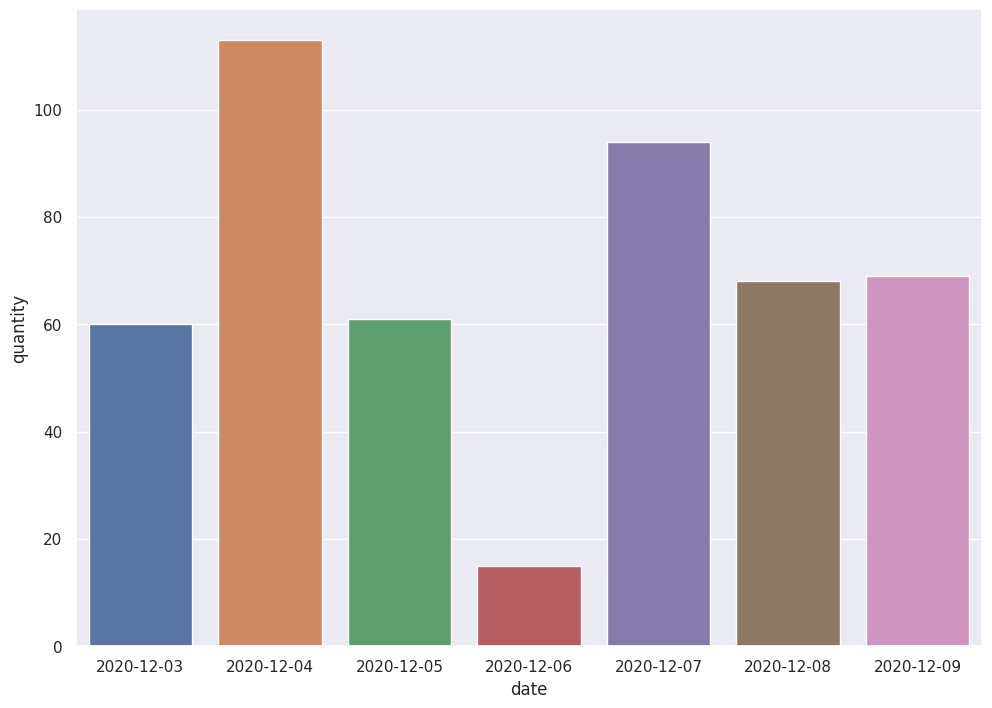

In [23]:
sns.barplot(x='date', y='quantity', data=y)

In [24]:
true_df.drop_duplicates(subset=['date', 'name','product_id'])

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
0,0,18,4,2020-12-07,Petr_Fedorov
1,1,94,4,2020-12-07,Petr_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [25]:
last_df=true_df.groupby(['name','product_id'],as_index=False).agg({'date':'nunique'})

In [26]:
last_df

,name,product_id,date
0,Alexey_Fedorov,13,1
1,Alexey_Fedorov,15,1
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
4,Alexey_Fedorov,50,1
...,...,...,...
153,Vasiliy_Ivanov,83,1
154,Vasiliy_Ivanov,94,1
155,Vasiliy_Ivanov,95,1
156,Vasiliy_Petrov,27,1


In [27]:
last_df.query('date>1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
